In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, mean_squared_error,plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.neural_network import MLPClassifier
import argparse

   gender  marital  religion  ethnicity  family  age  education  occupation  \
0       0        1         0          0       1    1          0           2   
1       0        1         1          1       1    1          0           2   
2       0        1         1          1       1    1          1           1   
3       0        0         1          1       1    1          0           2   
4       1        1         1          1       2    1          0           1   

   salary  reference  status  property  relationship  duration  history  \
0       0          1       0         0             5         3        0   
1       0          1       0         0             5         3        0   
2       0          1       0         0             5         3        0   
3       0          1       0         1             5         3        0   
4       0          0       0         1             5         3        0   

   status2  
0        1  
1        1  
2        1  
3        1  
4        

gender              AxesSubplot(0.125,0.71587;0.168478x0.16413)
marital          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
religion         AxesSubplot(0.529348,0.71587;0.168478x0.16413)
ethnicity        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
family             AxesSubplot(0.125,0.518913;0.168478x0.16413)
age             AxesSubplot(0.327174,0.518913;0.168478x0.16413)
education       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
occupation      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
salary             AxesSubplot(0.125,0.321957;0.168478x0.16413)
reference       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
status          AxesSubplot(0.529348,0.321957;0.168478x0.16413)
property        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
relationship          AxesSubplot(0.125,0.125;0.168478x0.16413)
duration           AxesSubplot(0.327174,0.125;0.168478x0.16413)
history            AxesSubplot(0.529348,0.125;0.168478x0.16413)
status2            AxesSubplot(0.731522,

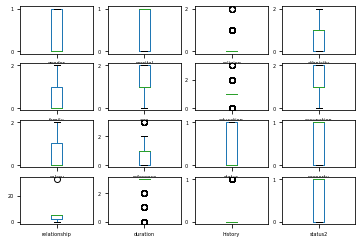

In [2]:
data=pd.read_csv('C:\\Users\\User\\Desktop\\datasets\\janetdata.csv')
new=data.drop('ID',axis=1)
print(new.head())
X=new[['gender','marital','religion','ethnicity','family','age','education','occupation','salary','reference','property','relationship','duration','history']]

y= new['status2']
print(y.name)
print(X.shape)
y.shape
new.plot(kind='box', subplots='True', layout=(4,4), sharex=False, fontsize=5)

In [3]:
#print(new.head(20))
new.describe()


,gender,marital,religion,ethnicity,family,age,education,occupation,salary,reference,status,property,relationship,duration,history,status2
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,0.332873,0.640884,0.200276,0.711326,0.577348,1.053867,0.885359,1.191989,0.392265,0.784530,0.266575,0.715470,3.675414,2.506906,0.225138,0.733425
std,0.471567,0.480073,0.420696,0.471405,0.634059,0.686663,0.628380,0.742238,0.576867,0.766146,0.442474,0.451502,2.231028,1.027267,0.417962,0.442474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000
max,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,33.000000,3.000000,1.000000,1.000000


In [4]:
#train and validation splitting 
(train_X, test_X, train_y, test_y)=train_test_split(X,y,test_size=0.30, random_state=7)

In [5]:
num_folds=7
scoring="accuracy"

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 91.897695, DEVIATION: (0.017224)
knn: 86.744401, DEVIATION: (0.035017)
naive_bayes: 91.101326, DEVIATION: (0.027610)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


svm: 92.294521, DEVIATION: (0.021876)
decision_tree: 89.511307, DEVIATION: (0.042767)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


random_forest: 92.291803, DEVIATION: (0.021900)


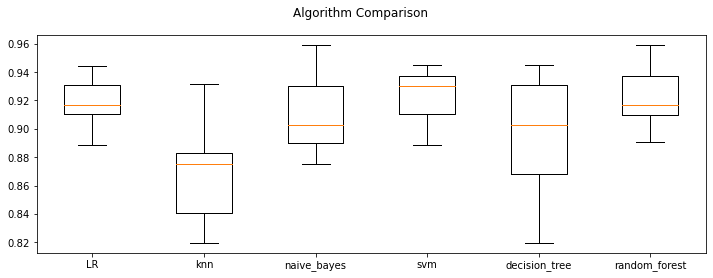

In [6]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive_bayes',GaussianNB()))
models.append(('svm',SVC()))
models.append(('decision_tree',DecisionTreeClassifier()))
models.append(('random_forest',RandomForestClassifier()))
results=[]
names=[]


for name, model in models:
    kfold= KFold(n_splits=num_folds, random_state=7)
    cv_results=cross_val_score(model,train_X,train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
   
    res="%s: %f, DEVIATION: (%f)" %(name,cv_results.mean()*100, cv_results.std())
    print(res)
    
    
fig=plt.figure(figsize=(12,4))
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)


plt.show()



In [7]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Accuracy: 94.4954128440367
Mean_Squared_Error: 0.05504587155963303
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        57
           1       0.93      1.00      0.96       161

    accuracy                           0.94       218
   macro avg       0.97      0.89      0.92       218
weighted avg       0.95      0.94      0.94       218

[[ 45  12]
 [  0 161]]


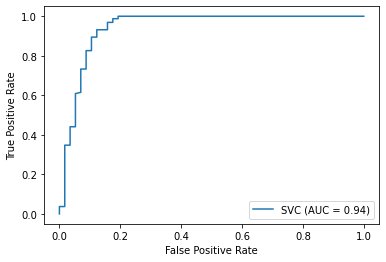

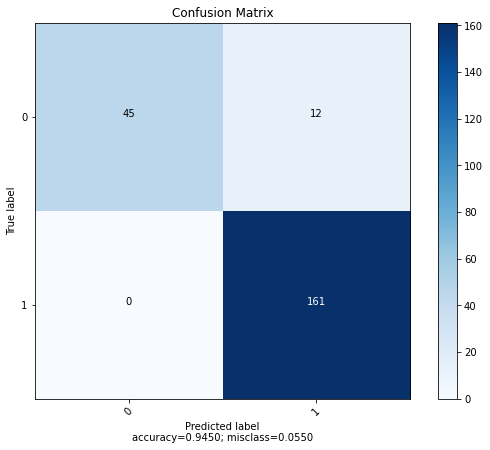

Text(0, 0.5, 'predicted')

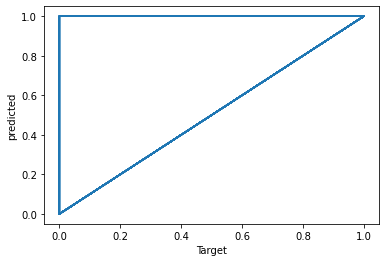

In [8]:
mod=SVC()
mod.fit(train_X,train_y)
pred=mod.predict(test_X)
Acc=classification_report(test_y,pred)
matrix=confusion_matrix(test_y,pred)
svc_disp=plot_roc_curve(mod,test_X,test_y)
print("Accuracy:",accuracy_score(test_y,pred)*100)
print("Mean_Squared_Error:",mean_squared_error(test_y,pred))
print(Acc)
print(matrix)
plot_confusion_matrix(cm = np.array([[ 45,  12],
 [  0, 161]]), 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")
plt.show()
plt.figure()
plt.plot(test_y,pred)
plt.xlabel('Target')
plt.ylabel('predicted')




Accuracy: 94.4954128440367
Mean_Squared_Error: 0.05504587155963303
              precision    recall  f1-score   support

           0       0.98      0.81      0.88        57
           1       0.94      0.99      0.96       161

    accuracy                           0.94       218
   macro avg       0.96      0.90      0.92       218
weighted avg       0.95      0.94      0.94       218

[[ 46  11]
 [  1 160]]


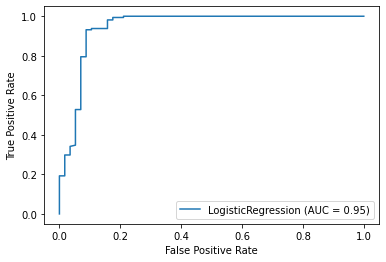

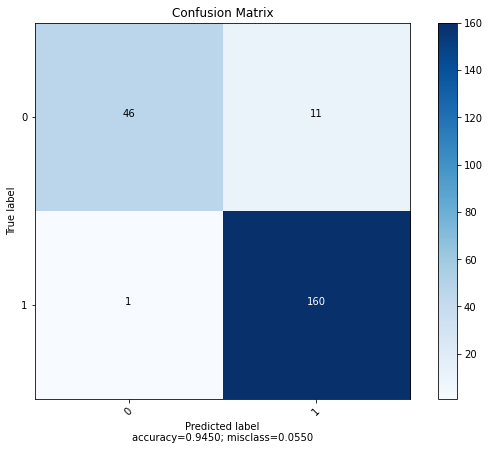

Text(0, 0.5, 'predicted')

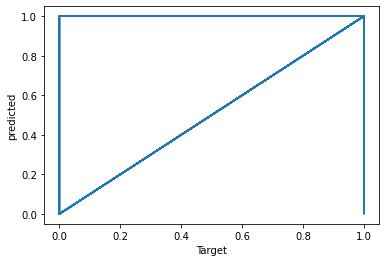

In [9]:

mod=LogisticRegression()
mod.fit(train_X,train_y)
pred=mod.predict(test_X)
Acc=classification_report(test_y,pred)
matrix=confusion_matrix(test_y,pred)
svc_disp=plot_roc_curve(mod,test_X,test_y)
print("Accuracy:",accuracy_score(test_y,pred)*100)
print("Mean_Squared_Error:",mean_squared_error(test_y,pred))
print(Acc)
print(matrix)

plot_confusion_matrix(cm = np.array([[ 46,  11],
 [  1,160]]), 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")
plt.figure()
plt.plot(test_y,pred)
plt.xlabel('Target')
plt.ylabel('predicted')


Accuracy: 88.53211009174312
Mean_Squared_Error: 0.11467889908256881
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        57
           1       0.89      0.96      0.93       161

    accuracy                           0.89       218
   macro avg       0.88      0.81      0.84       218
weighted avg       0.88      0.89      0.88       218

[[ 38  19]
 [  6 155]]


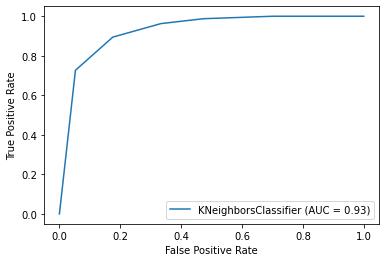

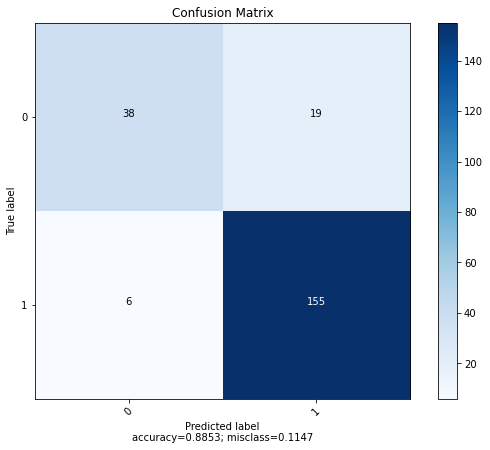

Text(0, 0.5, 'predicted')

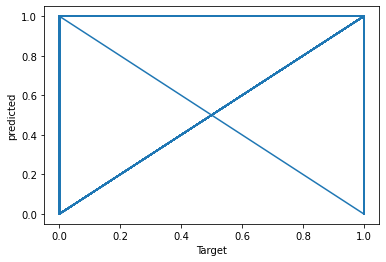

In [10]:
mod=KNeighborsClassifier()
mod.fit(train_X,train_y)
pred=mod.predict(test_X)
Acc=classification_report(test_y,pred)
matrix=confusion_matrix(test_y,pred)
svc_disp=plot_roc_curve(mod,test_X,test_y)
print("Accuracy:",accuracy_score(test_y,pred)*100)
print("Mean_Squared_Error:",mean_squared_error(test_y,pred))
print(Acc)
print(matrix)
plot_confusion_matrix(cm = np.array([[ 38, 19],
 [  6, 155]]), 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")
plt.figure()
plt.plot(test_y,pred)
plt.xlabel('Target')
plt.ylabel('predicted')


Accuracy: 89.44954128440367
Mean_Squared_Error: 0.10550458715596331
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        57
           1       0.95      0.91      0.93       161

    accuracy                           0.89       218
   macro avg       0.86      0.88      0.87       218
weighted avg       0.90      0.89      0.90       218

[[ 49   8]
 [ 15 146]]


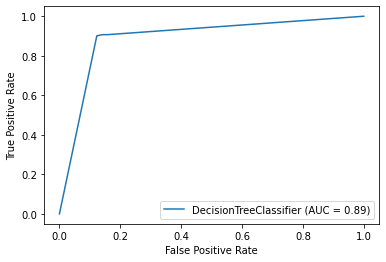

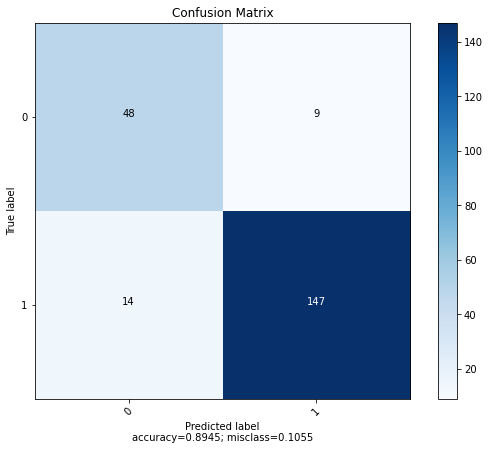

Text(0, 0.5, 'predicted')

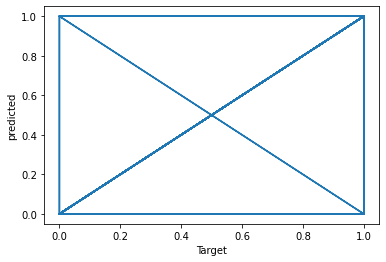

In [11]:
mod=DecisionTreeClassifier()
mod.fit(train_X,train_y)
pred=mod.predict(test_X)
Acc=classification_report(test_y,pred)
matrix=confusion_matrix(test_y,pred)
svc_disp=plot_roc_curve(mod,test_X,test_y)
print("Accuracy:",accuracy_score(test_y,pred)*100)
print("Mean_Squared_Error:",mean_squared_error(test_y,pred))
print(Acc)
print(matrix)
plot_confusion_matrix(cm = np.array([[ 48,   9],
 [ 14, 147]]), 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")
plt.figure()
plt.plot(test_y,pred)
plt.xlabel('Target')
plt.ylabel('predicted')


Accuracy: 93.11926605504587
Mean_Squared_Error: 0.06880733944954129
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        57
           1       0.93      0.98      0.95       161

    accuracy                           0.93       218
   macro avg       0.93      0.89      0.91       218
weighted avg       0.93      0.93      0.93       218

[[ 46  11]
 [  4 157]]


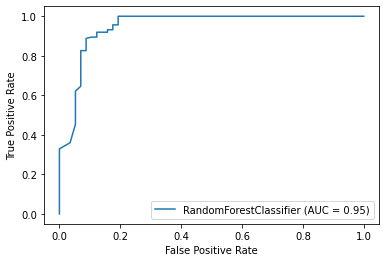

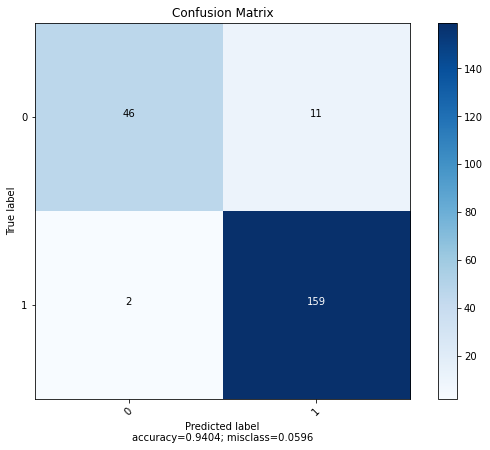

Text(0, 0.5, 'predicted')

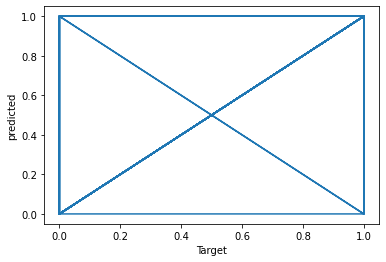

In [12]:
mod=RandomForestClassifier()
mod.fit(train_X,train_y)
pred=mod.predict(test_X)
Acc=classification_report(test_y,pred)
matrix=confusion_matrix(test_y,pred)
svc_disp=plot_roc_curve(mod,test_X,test_y)
print("Accuracy:",accuracy_score(test_y,pred)*100)
print("Mean_Squared_Error:",mean_squared_error(test_y,pred))
print(Acc)
print(matrix)
plot_confusion_matrix(cm = np.array([[ 46,  11],
 [  2, 159]]), 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")
plt.figure()
plt.plot(test_y,pred)
plt.xlabel('Target')
plt.ylabel('predicted')


Accuracy: 93.11926605504587
Mean_Squared_Error: 0.06880733944954129
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        57
           1       0.94      0.97      0.95       161

    accuracy                           0.93       218
   macro avg       0.92      0.90      0.91       218
weighted avg       0.93      0.93      0.93       218

[[ 47  10]
 [  5 156]]


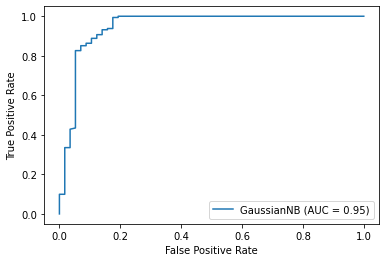

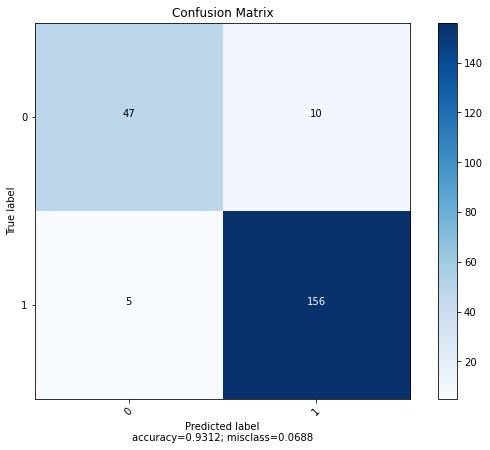

Text(0, 0.5, 'predicted')

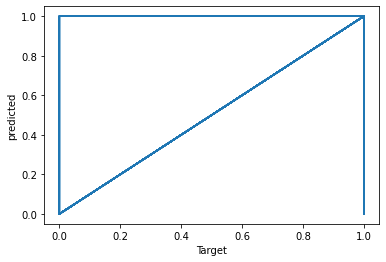

In [13]:
mod=GaussianNB()
mod.fit(train_X,train_y)
pred=mod.predict(test_X)
Acc=classification_report(test_y,pred)
matrix=confusion_matrix(test_y,pred)
svc_disp=plot_roc_curve(mod,test_X,test_y)
print("Accuracy:",accuracy_score(test_y,pred)*100)
print("Mean_Squared_Error:",mean_squared_error(test_y,pred))
print(Acc)
print(matrix)
plot_confusion_matrix(cm = np.array([[ 47,  10],
 [  5, 156]]), 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")
plt.figure()
plt.plot(test_y,pred)
plt.xlabel('Target')
plt.ylabel('predicted')


In [16]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4, 3), random_state=1,max_iter=800)
clf.fit(train_X,train_y)

pred=clf.predict(test_X)

In [134]:
#clf.predict_proba(test_X)

Accuracy: 93.11926605504587
Mean_Squared_Error: 0.06880733944954129
[[ 47  10]
 [  5 156]]


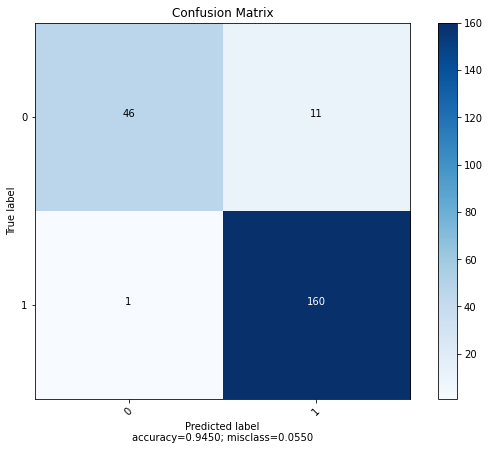

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        57
           1       0.94      0.97      0.95       161

    accuracy                           0.93       218
   macro avg       0.92      0.90      0.91       218
weighted avg       0.93      0.93      0.93       218



In [15]:
n_correct = sum(pred == test_y)
acc=n_correct / len(pred)
print("Accuracy:",acc*100)
print("Mean_Squared_Error:",mean_squared_error(test_y,pred))
matrix=confusion_matrix(test_y,pred)
print(matrix)
plot_confusion_matrix(cm = np.array([[ 46, 11],
 [  1, 160]]), 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")
rep=classification_report(test_y,pred)
print(rep)

{'whiskers': [<matplotlib.lines.Line2D at 0x14716ce5448>,
 'caps': [<matplotlib.lines.Line2D at 0x14716d8da48>,
 'boxes': [<matplotlib.lines.Line2D at 0x14716ce5a08>],
 'medians': [<matplotlib.lines.Line2D at 0x14716d4d288>],
 'fliers': [<matplotlib.lines.Line2D at 0x14716d4de88>],
 'means': []}

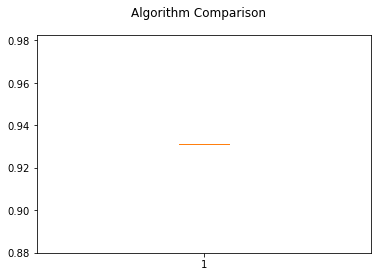

In [19]:
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(acc)
